In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style as style
#style.available
style.use('tableau-colorblind10')
# style.use('seaborn-notebook')
# style.use('seaborn-whitegrid')

# To pre-process and test cleaning results
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay

# Data Pre-processing for Classification

In [25]:
data_df = pd.read_csv('../data/rock_data.csv')
data_df.head()

,Sample ID,Rock ID,Class,Orientation,Perimeter,Area,Axis Major Length,Axis Minor Length,Mean Height,Median Height,Max Height,STD Height,Mean Gradient,STD Gradient,Gradient at Max,Weighted Hu Moment 1,Weighted Hu Moment 2,Weighted Hu Moment 3,Weighted Hu Moment 4
0,1,1,12,-1.041790,75.254834,369,25.762853,18.766355,6.062,7.727,14.140625,3.620,2.201636,1.656408,1.251277,0.020572,0.000044,1.753849e-06,1.845401e-07
1,1,2,12,1.243127,58.526912,226,19.162825,15.681881,3.562,2.370,8.375000,2.537,1.753659,1.341264,0.824432,0.034420,0.000043,1.549995e-05,2.660719e-06
2,1,3,12,-0.504405,84.325902,458,28.895700,20.471795,6.293,8.340,11.242188,3.184,1.873784,1.783636,1.296682,0.021760,0.000099,4.577458e-07,2.595684e-08
3,1,4,12,1.127237,68.526912,330,23.377860,18.330763,5.390,6.650,8.382812,3.113,1.941693,1.635806,1.758015,0.022975,0.000043,2.084129e-06,6.187966e-08
4,1,5,12,1.547845,75.012193,371,27.021833,17.801481,7.938,8.470,14.453125,4.668,2.843890,1.893001,0.862286,0.015672,0.000051,5.241128e-08,7.596124e-10


In [26]:
data_df.describe()

,Sample ID,Rock ID,Class,Orientation,Perimeter,Area,Axis Major Length,Axis Minor Length,Mean Height,Median Height,Max Height,STD Height,Mean Gradient,STD Gradient,Gradient at Max,Weighted Hu Moment 1,Weighted Hu Moment 2,Weighted Hu Moment 3,Weighted Hu Moment 4
count,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1.090000e+03,1.090000e+03
mean,2.498165,46.536697,32.761468,-0.006927,84.636546,485.309174,29.145724,21.166986,7.764839,8.626452,13.626127,3.961050,2.291225,2.196719,2.749150,0.019338,5.818620e-05,9.381700e-07,1.637622e-07
std,1.113609,27.221923,18.273606,0.936530,18.626299,192.943163,6.939476,4.070433,2.434629,2.846411,4.323551,1.178028,0.669571,0.629450,3.128562,0.006620,7.871598e-05,2.135060e-06,7.210219e-07
min,1.000000,1.000000,12.000000,-1.569547,33.656854,89.000000,11.779944,9.788845,1.918000,1.904000,2.597656,0.698700,0.499647,0.628524,0.000000,0.007581,2.240924e-08,1.157295e-10,3.202838e-11
25%,2.000000,23.000000,12.000000,-0.852017,71.012193,343.000000,24.141299,18.141639,5.940000,6.950750,10.445312,3.040000,1.819583,1.779479,0.647996,0.014781,1.319073e-05,1.280317e-07,9.328293e-09
50%,3.000000,46.000000,34.000000,-0.023031,82.083261,447.500000,28.144280,20.684458,7.451500,8.190000,13.593750,3.806000,2.199759,2.084212,1.531893,0.018461,3.509218e-05,3.772613e-07,3.267384e-08
75%,3.000000,69.000000,58.000000,0.803196,95.982756,596.750000,32.991582,23.622454,9.213750,10.253500,16.093750,4.664000,2.639860,2.543609,3.580629,0.022615,7.003065e-05,9.603120e-07,9.744988e-08
max,4.000000,101.000000,58.000000,1.570524,168.953319,1485.000000,57.778465,39.194203,18.580000,21.030000,28.359375,8.370000,6.045946,5.859346,18.789070,0.075881,6.816825e-04,3.913868e-05,1.638788e-05


## Main parameters distribution analysis

### Density distribution

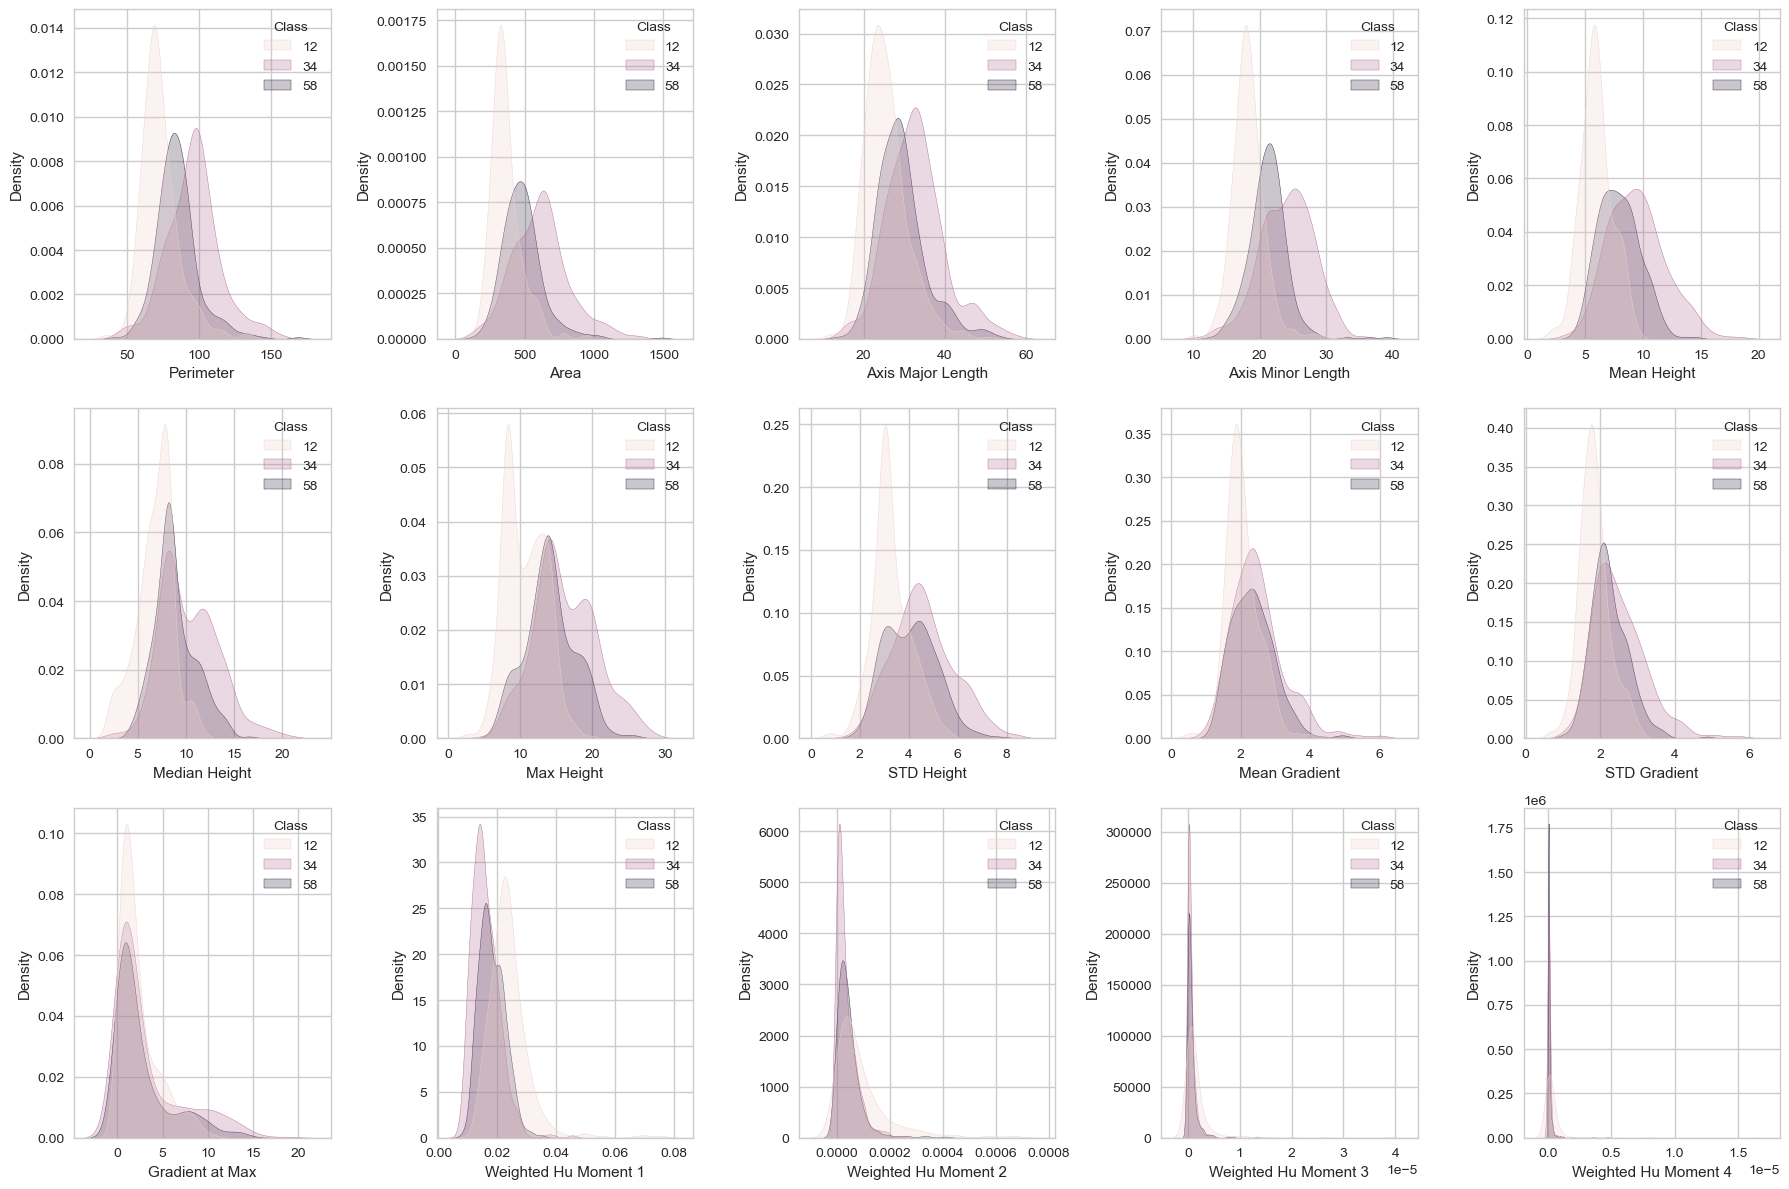

In [100]:
# Plot distributions
cols = data_df.columns[4:] # colums to plot - leaving out sample ID, rock #, Class and orientation
rows_num = 3 # Subplot grid rows
cols_num = int(len(cols)/rows_num) # Subplot grid columns
# Plot
plt.figure(figsize=(18, 12))
for i, col in enumerate(cols):
    plt.subplot(rows_num, cols_num, i+1)
    sns.kdeplot(data=data_df, x=col, shade='fill', hue='Class')

plt.tight_layout()
plt.show()

### Comments
The main parameters (Perimeter, Area, Axis Major and Minor lengths and Mean Height) seem to show normal distribution. The distribution for the different classes tend to overlap, which will make the classificaiton task harder.

Median Height, Max Heaight and STD Height show binomial distributions, again overlapped among classes. 

## Boxplots

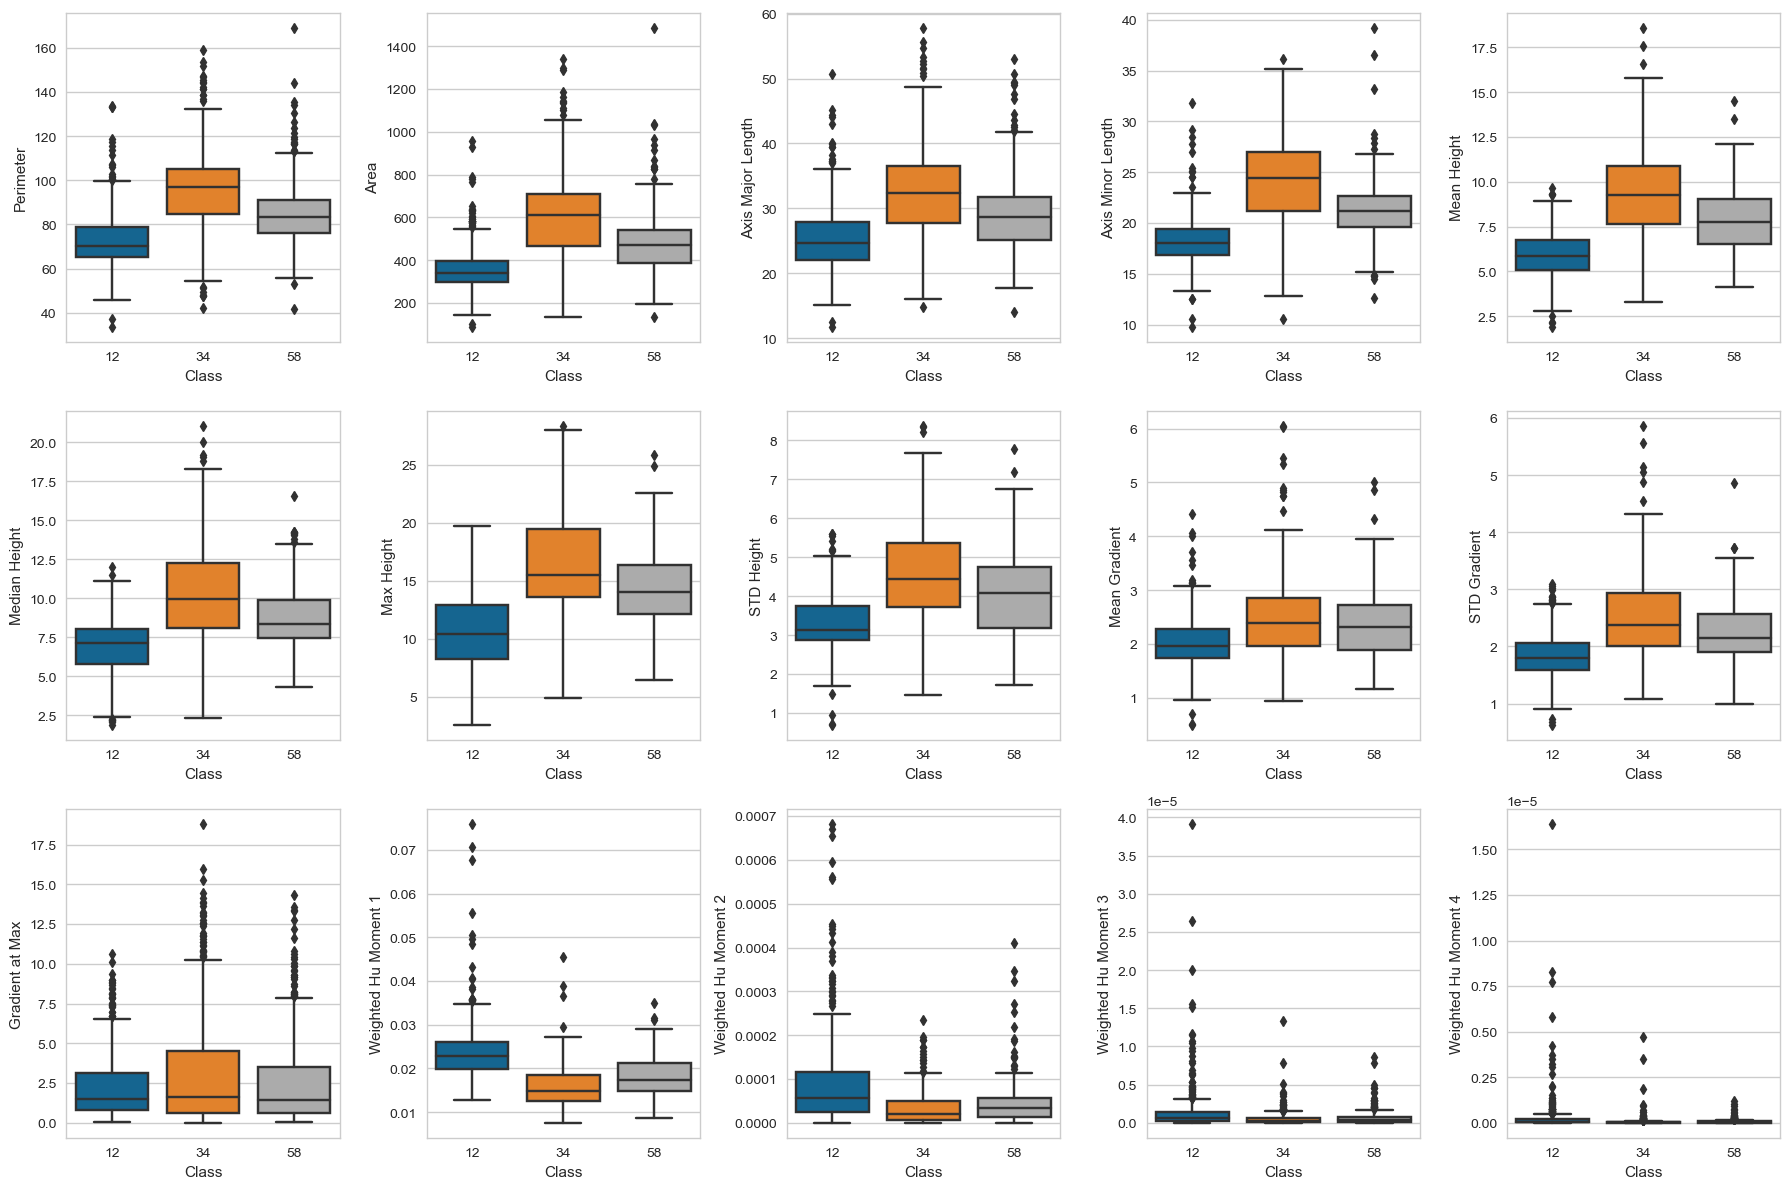

In [105]:
# Boxplots
cols = data_df.columns[4:] # colums to plot - leaving out sample ID, rock #, Class and orientation
rows_num = 3 # Subplot grid rows
cols_num = int(len(cols)/rows_num) # Subplot grid columns
# Plot
plt.figure(figsize=(18, 12))
for i, col in enumerate(cols):
    plt.subplot(rows_num, cols_num, i+1)
    sns.boxplot(data=data_df, y=col, x='Class', orient='v', dodge=True)

plt.tight_layout()
plt.show()

### Comments
In all the main parameters there's an indication of outliers over the high side, with the distribution skewed over the low side.

## Parameters correlation

In [63]:
data_pairplot = data_df[data_df.columns[2:9]].drop(columns='Orientation')

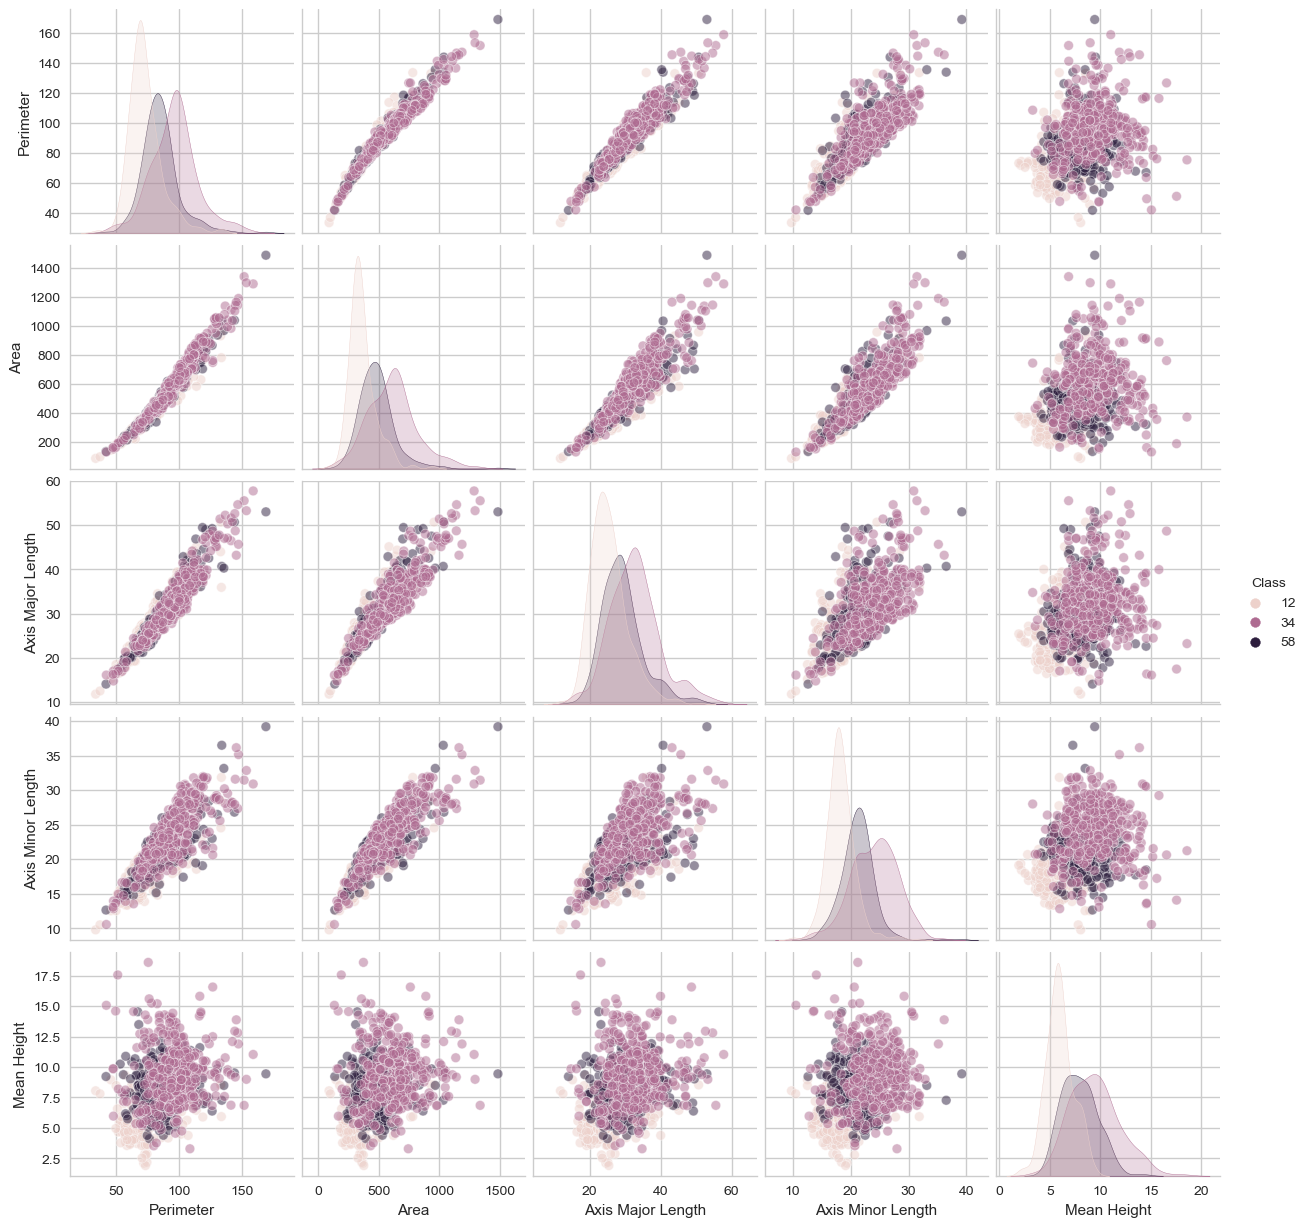

In [64]:
sns.pairplot(data_pairplot, hue='Class',plot_kws={'alpha':0.5})
# plt.tight_layout()
plt.show()

There's a clear indication of correlation between Perimeter and Area (which makes sense), and a softer correlation between Perimeter & Area with Major and Minor lengths (which also makes sense).

### Pearson's Correlation Heatmap

In [110]:
# Compute correlation
df_corr = data_df[data_df.columns[2:]].drop(columns='Orientation').corr()
cols = data_df[data_df.columns[2:]].drop(columns='Orientation').columns

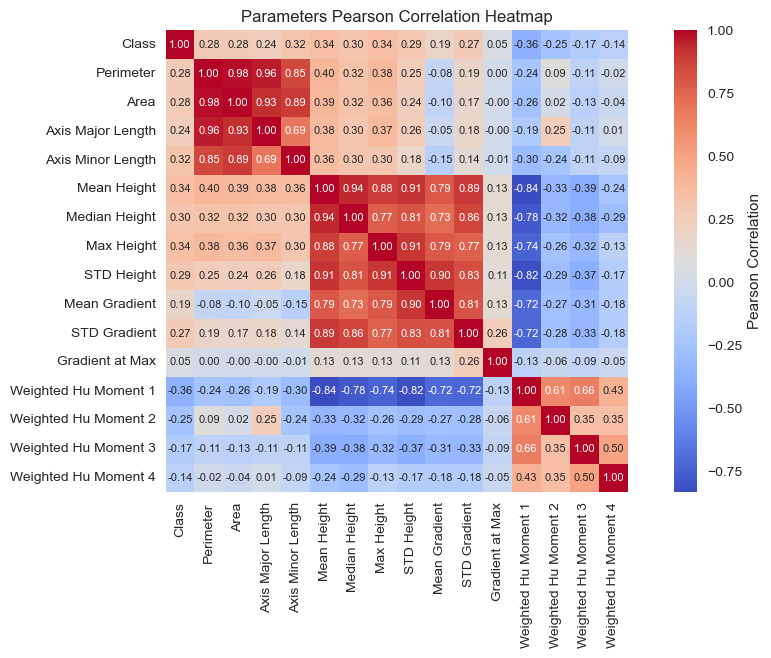

In [123]:
# Plot Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels=  cols, 
           yticklabels=  cols,
           cmap= 'coolwarm',
           cbar_kws={'label': 'Pearson Correlation'})

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title('Parameters Pearson Correlation Heatmap')
plt.show()

From the heatmap it can be observed that Area, Perimeter and Axis Major and Minor Length are highly correlated. The same happens with the Height mean, median, max. and standatd deviation, and the gradiend mean, max. and standard deviation.

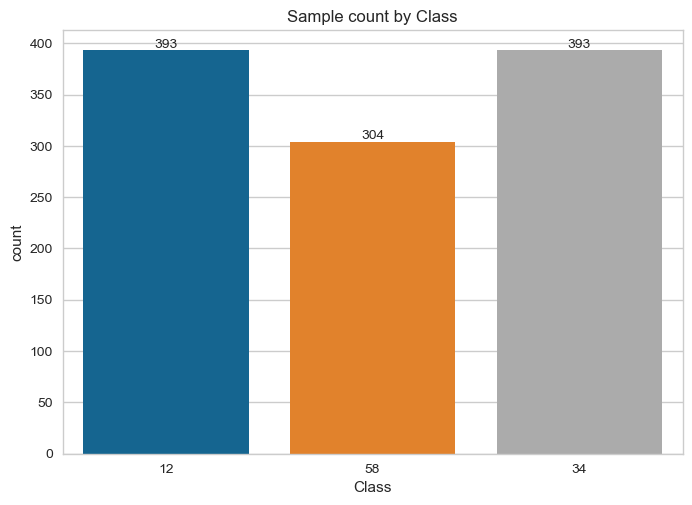

In [152]:
# Countplot per Class
order = data_df.Class.unique()
plt.title('Sample count by Class')
ax = sns.countplot(data=data_df,x='Class', order=order)
ax.bar_label(ax.containers[0])

plt.show()

Classes seem to be mostly balanced, with a little imbalance on the middle class (58) respect to classes 12 and 34.

## Simple model training
This step is done to understand main predictors and impact of removal of correlated parameters. The same for outliers removal.

In [172]:
X = data_df[data_df.columns[4:]].to_numpy()
y = data_df['Class'].to_numpy()
# Train/Test Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [173]:
# Train simple classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
# Get Feature Importances
importances_df = pd.DataFrame({'feature_name': columns,
                               'feature_importance': importances})
importances_df = importances_df.sort_values(by='feature_importance', ascending=False)

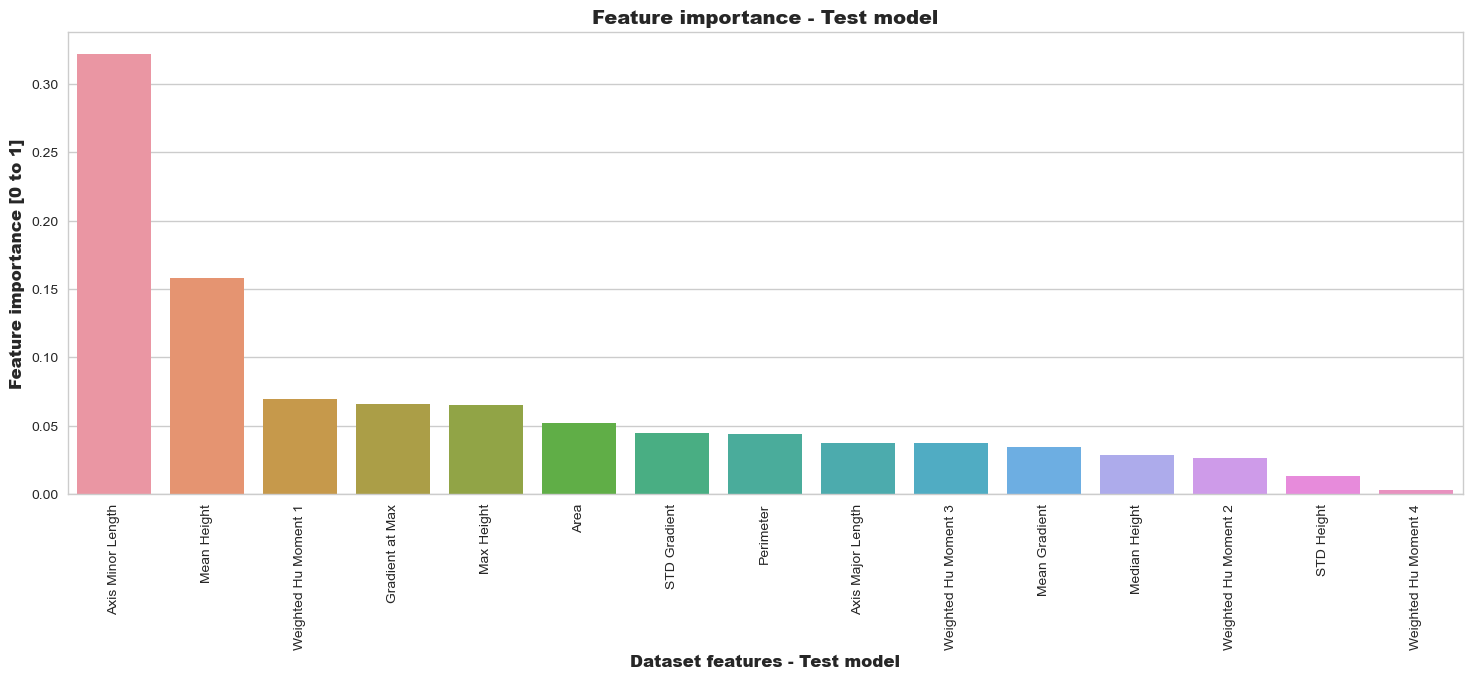

In [175]:
# Plot feature importances
plt.figure(figsize=(18,6))
sns.barplot(x=importances_df.feature_name, y=importances_df.feature_importance)
plt.title('Feature importance - Test model',fontsize=14, fontweight = 'black')
plt.xticks(rotation = 90)
plt.xlabel("Dataset features - Test model",fontsize=12, fontweight = 'black')
plt.ylabel("Feature importance [0 to 1]",fontsize=12, fontweight = 'black')
plt.show()

In [179]:
y_pred = tree_clf.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.7266175358797544

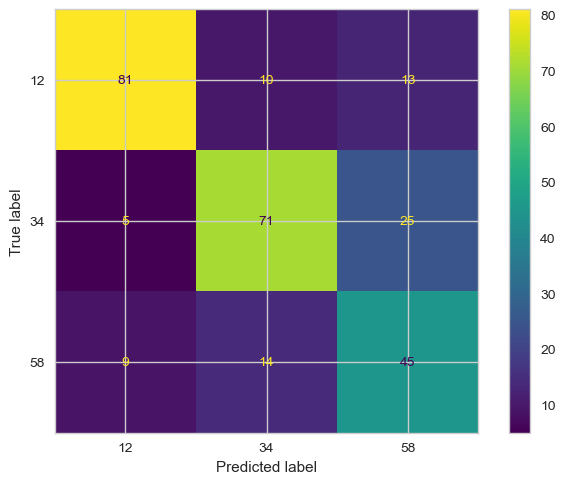

In [183]:
cm = confusion_matrix(y_test, y_pred, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree_clf.classes_)
disp.plot()
plt.show()